# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
url = "https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data"


In [ ]:
!kaggle datasets download -d henriqueyamahata/bank-marketing

Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
License(s): other
bank-marketing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip bank-marketing.zip

Archive:  bank-marketing.zip
replace bank-additional-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [ ]:
pd.set_option('display.max_column',None) # to show all columns
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

**Make columns_name more readable**

In [ ]:
df.rename(columns=lambda name:name.replace('.','_'),inplace=True)
df.rename(columns={'y':'target'},inplace=True)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

# EDA

step_1 read carefully bussiness domain

step_2 find relations between columns and target

In [ ]:
temp_data=df[df['target']=='yes']

find relation between job and people who accept subscribe

([<matplotlib.patches.Wedge at 0x78db046d46d0>,
 [Text(0.6704251451521318, 0.8720837831009949, 'admin.'),
  Text(-0.7018547546653553, 0.8469946300618643, 'blue-collar'),
  Text(-1.0283552422310023, 0.3904939125979003, 'entrepreneur'),
  Text(-1.0764757696852252, 0.22627398719384895, 'housemaid'),
  Text(-1.0958716717847754, -0.09521175862067441, 'management'),
  Text(-0.9062575026996703, -0.6234559638022219, 'retired'),
  Text(-0.5968108401622421, -0.9240220890567709, 'self-employed'),
  Text(-0.27629920916699535, -1.0647341203388259, 'services'),
  Text(0.16545430791448365, -1.0874855732342104, 'student'),
  Text(0.8127917491814178, -0.7411946926837855, 'technician'),
  Text(1.0880394632588453, -0.16177183435754242, 'unemployed'),
  Text(1.099654851370434, -0.0275537267437399, 'unknown')],
 [Text(0.36568644281025364, 0.4756820635096335, '29.1%'),
  Text(-0.3828298661811028, 0.461997070942835, '13.8%'),
  Text(-0.5609210412169103, 0.21299667959885468, '2.7%'),
  Text(-0.587168601646486

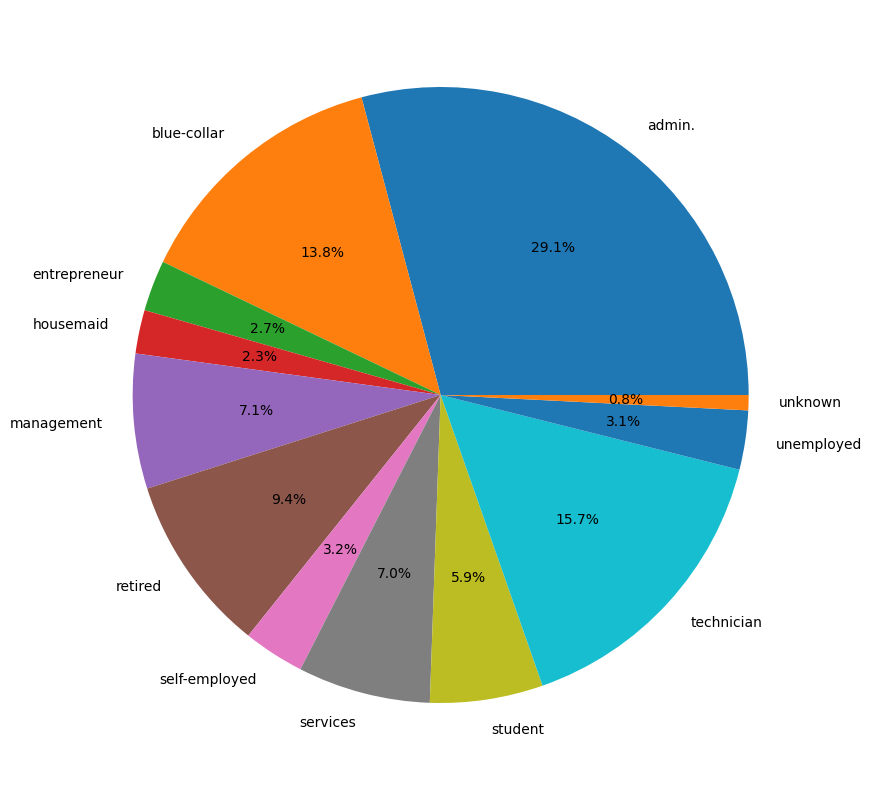

In [ ]:
ans=temp_data.groupby('job')['job'].value_counts()
values=ans.values
labels=ans.index
plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,autopct='%1.1f%%')

relation between marital state and subscribe

<BarContainer object of 4 artists>

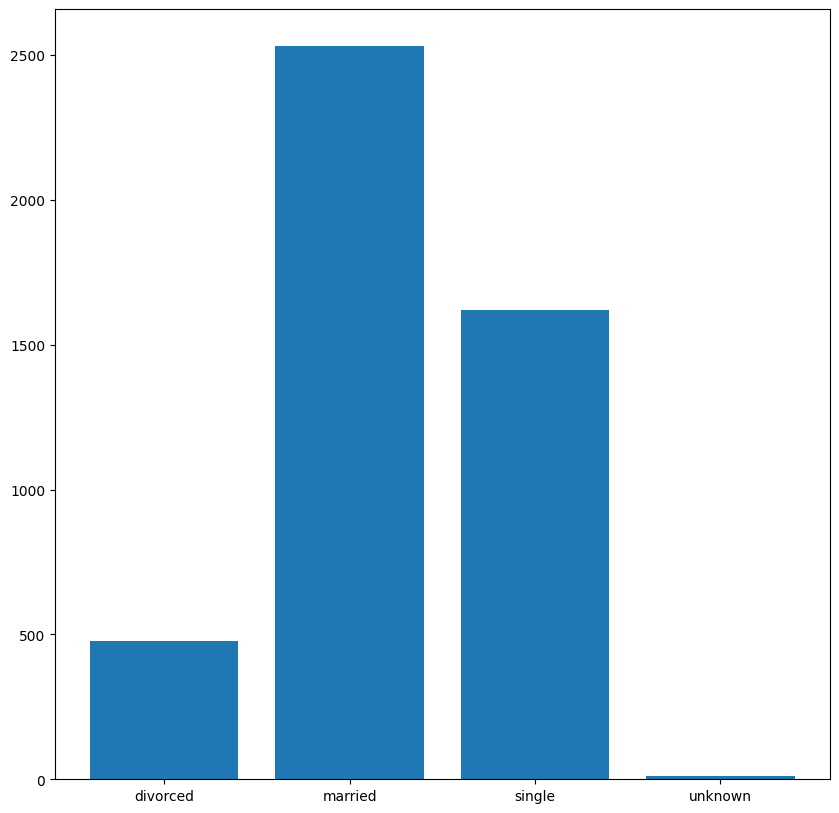

In [ ]:
ans=temp_data.groupby('marital')['marital'].value_counts()
values=ans.values
labels=ans.index
plt.figure(figsize=(10,10))
plt.bar(labels,values)

relation between education of person and subscribe

In [ ]:
ans=temp_data.groupby('education')['education'].value_counts()
values=ans.values
labels=ans.index

<BarContainer object of 8 artists>

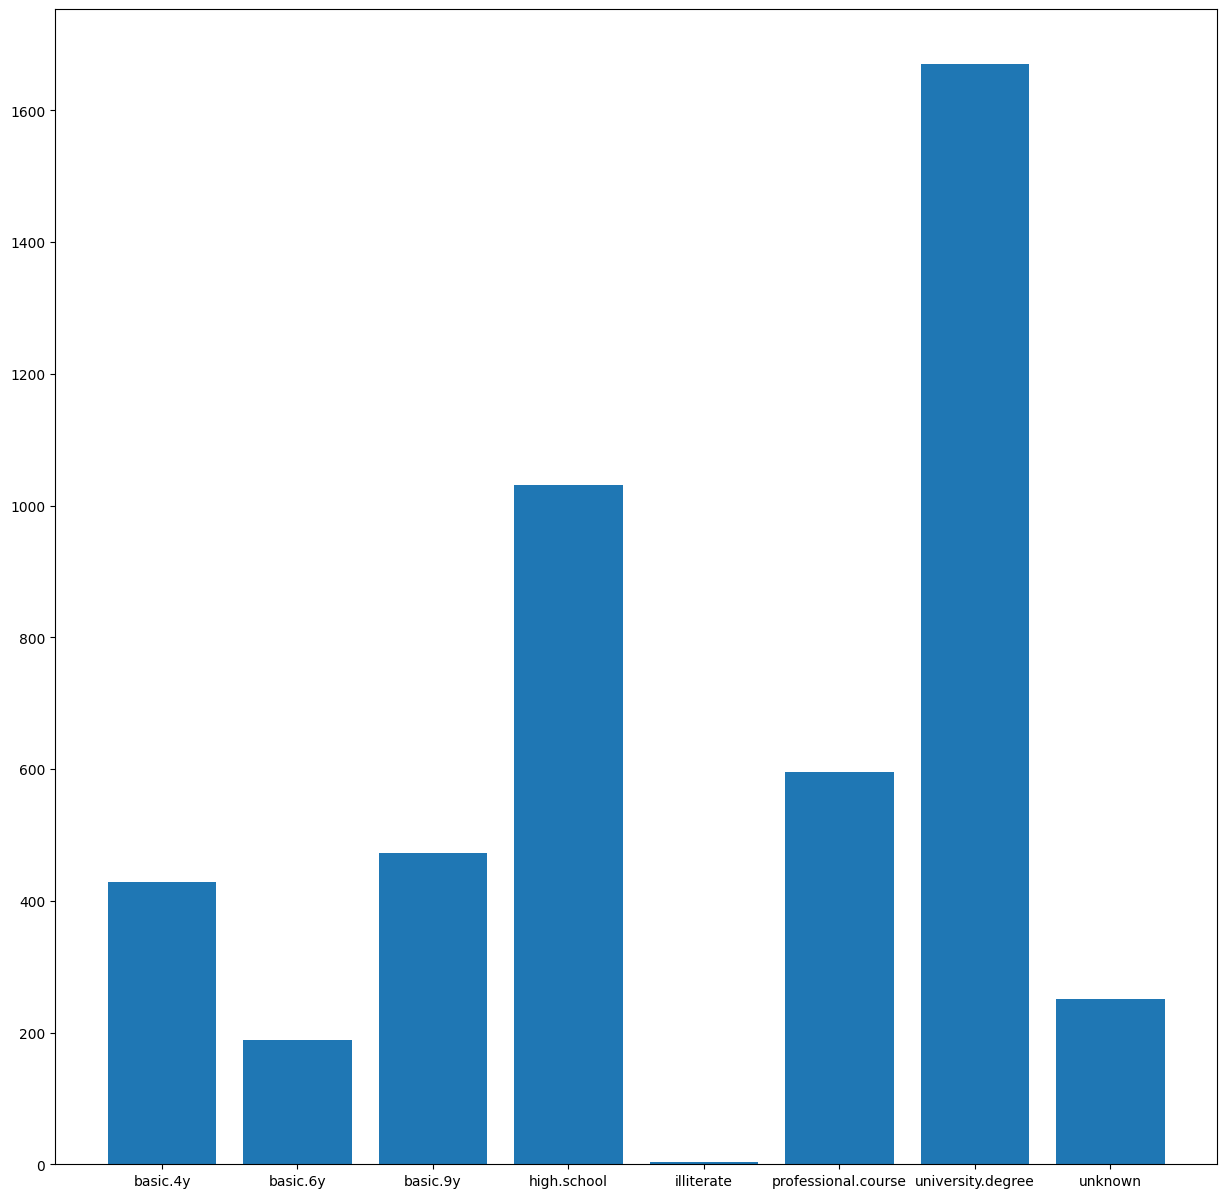

In [ ]:
plt.figure(figsize=(15,15))
plt.bar(labels,values)

show what is the best duration of last contact

<Axes: >

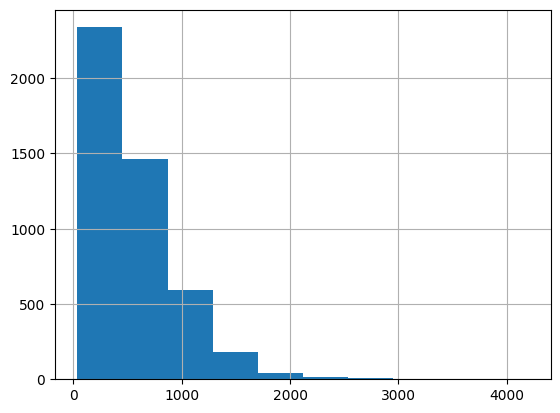

In [ ]:
temp_data['duration'].hist()

show is the best way of contact

([<matplotlib.patches.Wedge at 0x78db044344c0>,
 [Text(-0.9474979771567411, 0.5587911803919992, 'cellular'),
  Text(0.947498003315643, -0.5587911360364173, 'telephone')],
 [Text(-0.5168170784491315, 0.30479518930472677, '83.0%'),
  Text(0.5168170927176234, -0.30479516511077304, '17.0%')])

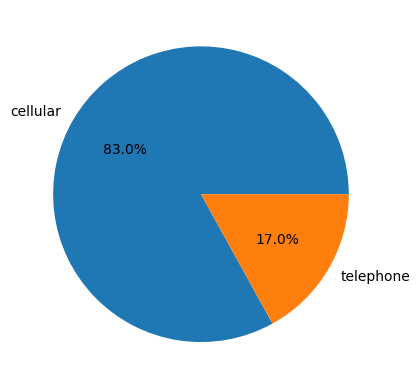

In [ ]:
ans=temp_data.groupby('contact')['contact'].value_counts()
values=ans.values
labels=ans.index
plt.pie(values,labels=labels,autopct='%1.1f%%')

# Preprocessing

**Check misssing values**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


**Check duplicated values**

In [ ]:
df.duplicated().sum()

12

In [ ]:
df=df.drop_duplicates()

**check Datatype**

**map all columns have datatype (object, categogery)**

In [ ]:
obj_col=set(df.select_dtypes(include='object').columns)
obj_col

{'contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome',
 'target'}

In [ ]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
wrapper={'no':0,'yes':1}
df['target'].replace(wrapper,inplace=True)

<ipython-input-81-2802ee9514aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'].replace(wrapper,inplace=True)


In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
wrapper={'blue-collar':7,'student':1,'services':2,'admin.':3,"management":4,'entrepreneur':5,'housemaid':6,'unknown':0,'technician':8,'unemployed':9,'self-employed':10,'retired':11}
df['job']=df['job'].replace(wrapper)

<ipython-input-83-c18ea0e01ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=df['job'].replace(wrapper)


In [ ]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
wrapper={'married':0,'single':1,'divorced':2,'unknown':3}
df['marital']=df['marital'].replace(wrapper)

In [ ]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
wrapper={'no':0,'yes':1,'unknown':3}
df['default']=df['default'].replace(wrapper)

In [ ]:
df['housing'].value_counts()

,count
housing,
yes,21571
no,18615
unknown,990


In [ ]:
wrapper={'no':0,'yes':1,'unknown':3}
df['housing']=df['housing'].replace(wrapper)

In [ ]:
df['loan'].value_counts()

,count
loan,
no,33938
yes,6248
unknown,990


In [ ]:
wrapper={'no':0,'yes':1,'unknown':3}
df['loan']=df['loan'].replace(wrapper)

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
wrapper={'basic.4y':0,'high.school':1,'university.degree':2,'basic.9y':3,"professional.course":4,'basic.6y':5,'illiterate':6,'unknown':7}
df['education']=df['education'].replace(wrapper)

In [ ]:
wrapper={'may':5,'jun':1,'jul':7,'aug':8,"nov":11,'mar':3,'apr':4,'oct':10,'sep':9,'dec':12}
df['month']=df['month'].replace(wrapper)

In [ ]:
x={'mon':2,'tue':3,'wed':4,'fri':6,'thu':5}
df['day_of_week']=df['day_of_week'].replace(x)

In [ ]:
x={'cellular':0,'telephone':1}
df['contact']=df['contact'].replace(x)

In [ ]:
x={'failure':0,'success':1,"nonexistent":2}
df['poutcome']=df['poutcome'].replace(x)

In [ ]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

**colleration**

<Axes: >

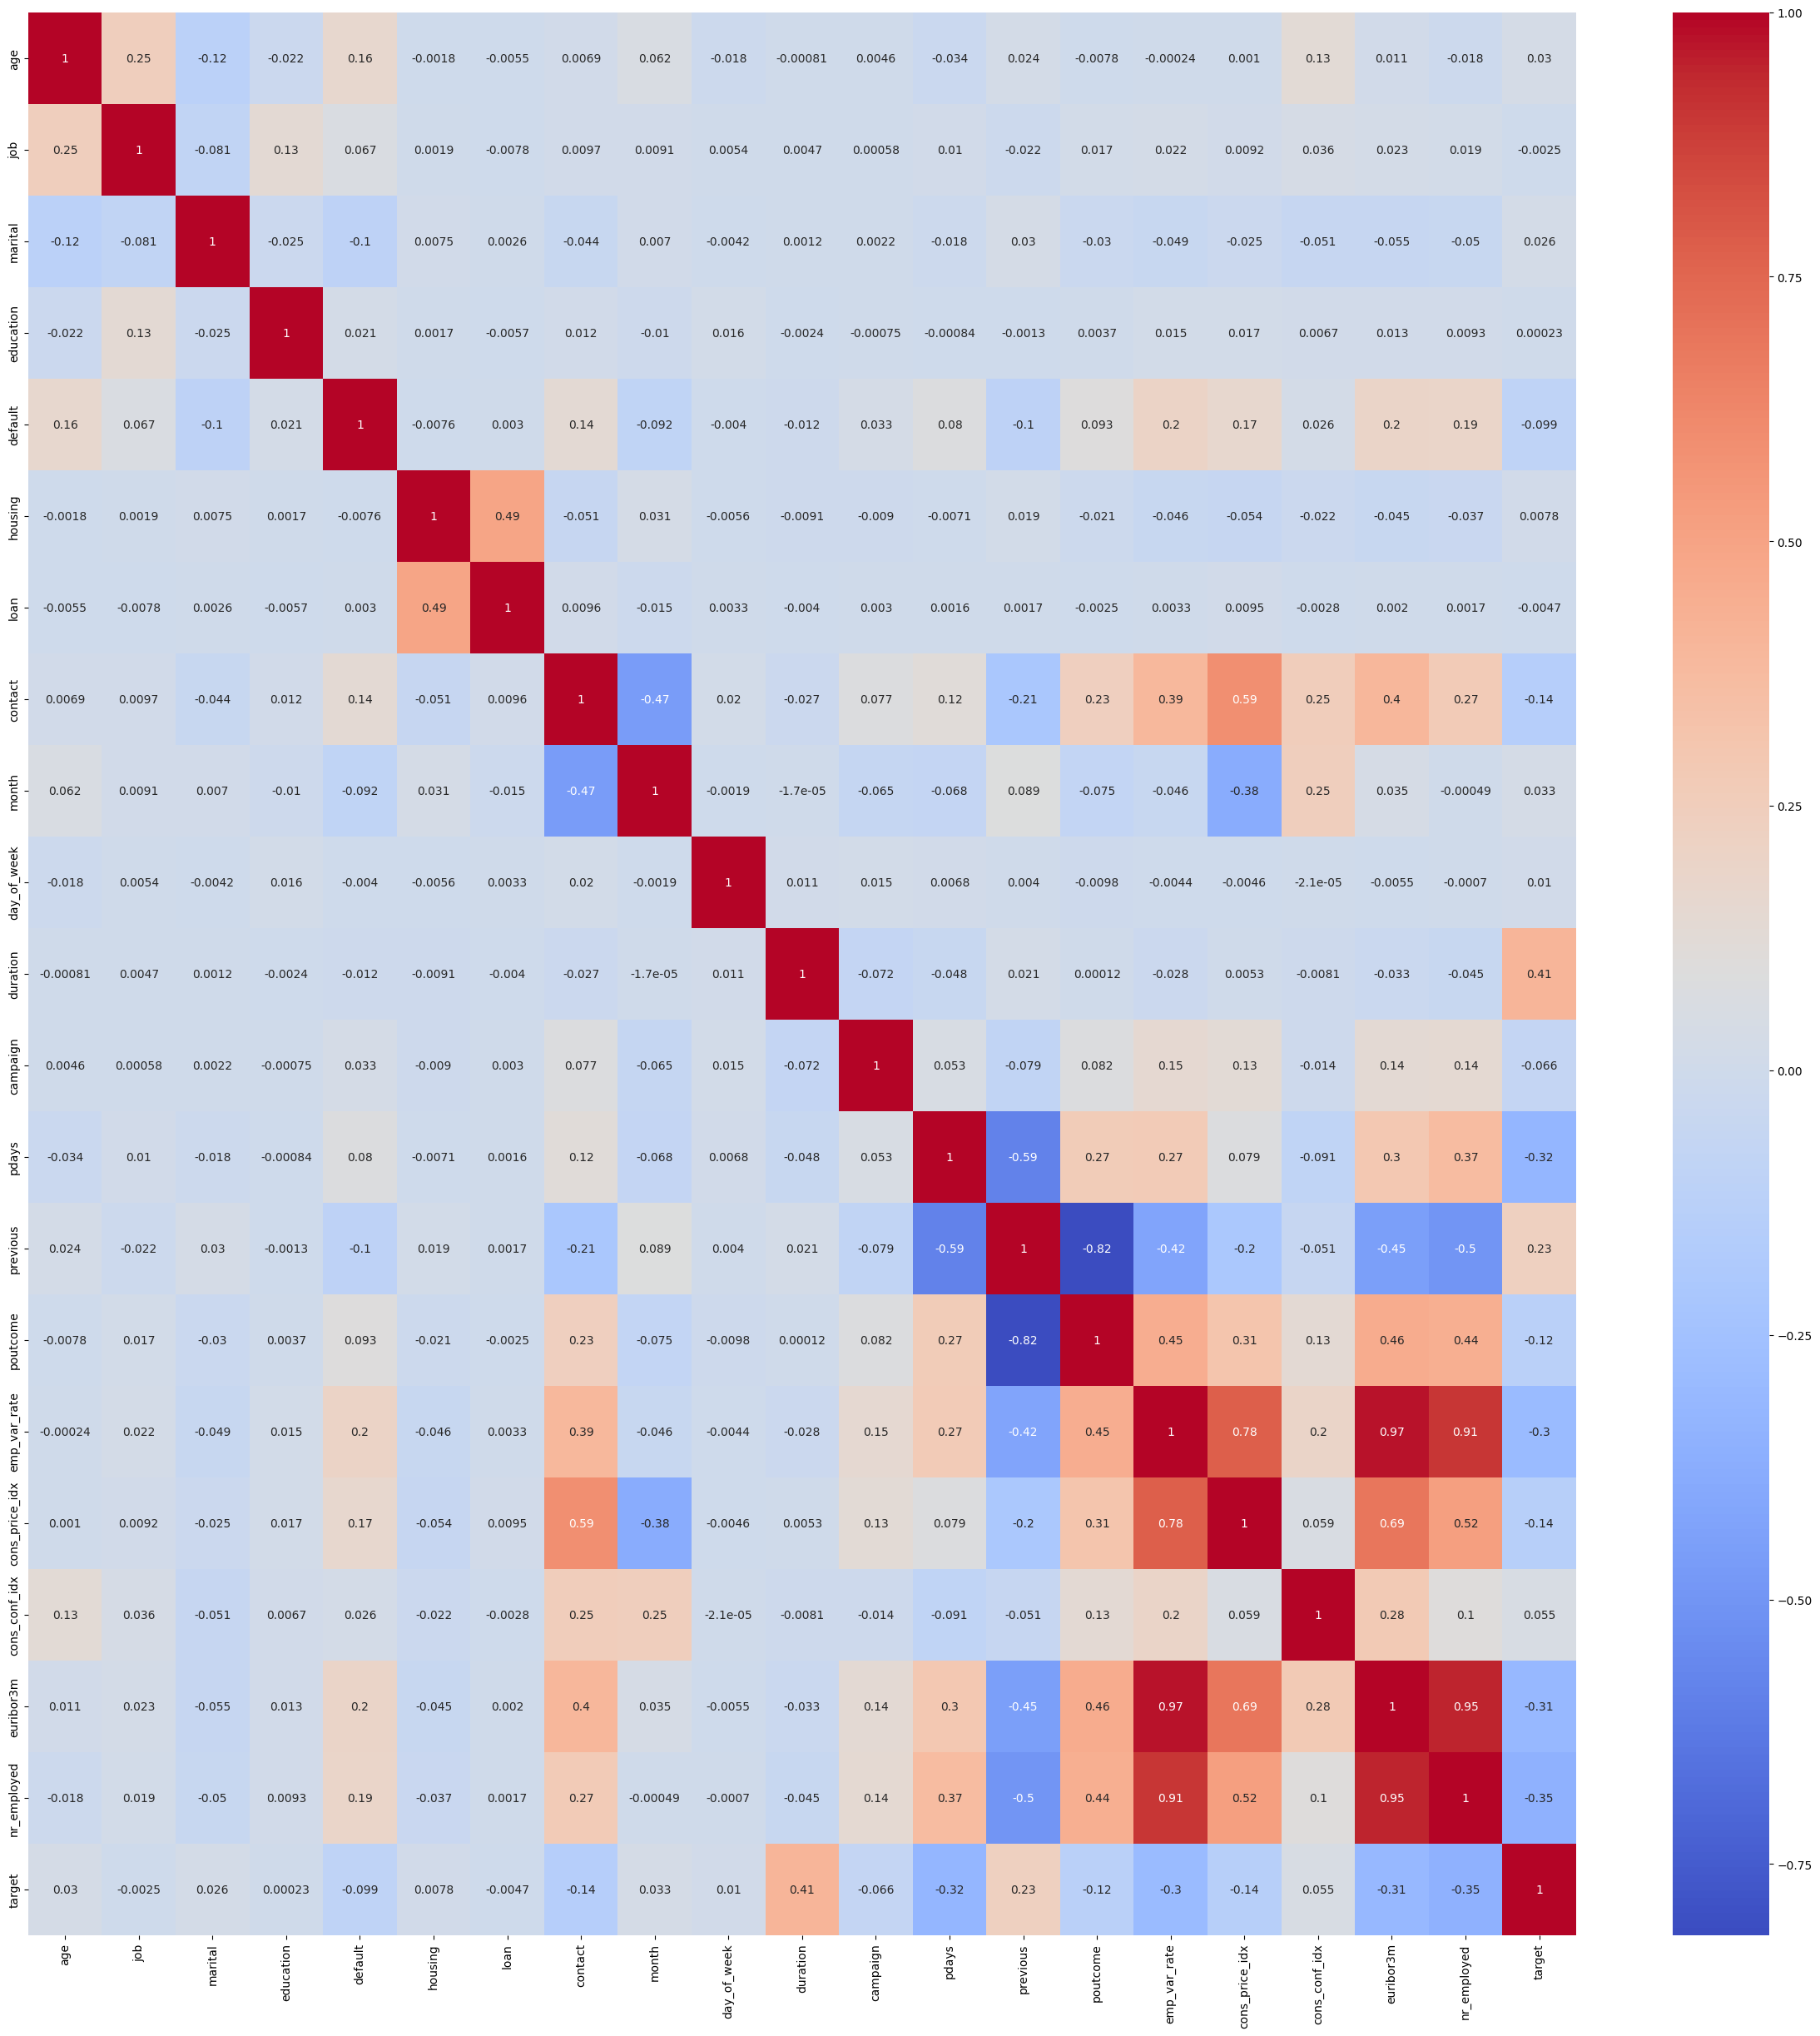

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
df=df.drop(['euribor3m','emp_var_rate'],axis=1) # drop columns have high colleration and doesnot have high effect on bussiness domain

**Outliers**

In [ ]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,nr_employed,target
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,5.496381,0.510637,2.346221,0.62636,0.596003,0.223868,0.365286,5.961968,3.979600,258.315815,2.567879,962.464810,0.173013,1.760127,93.575720,-40.502863,5167.034870,0.112663
std,10.42068,2.720439,0.696794,1.652525,1.21928,0.620525,0.563931,0.481516,2.786133,1.411539,259.305321,2.770318,186.937102,0.494964,0.623595,0.578839,4.627860,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000,0.000000
25%,32.00000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,5.000000,3.000000,102.000000,1.000000,999.000000,0.000000,2.000000,93.075000,-42.700000,5099.100000,0.000000
50%,38.00000,6.000000,0.000000,2.000000,0.00000,1.000000,0.000000,0.000000,5.000000,4.000000,180.000000,2.000000,999.000000,0.000000,2.000000,93.749000,-41.800000,5191.000000,0.000000
75%,47.00000,8.000000,1.000000,3.000000,0.00000,1.000000,0.000000,1.000000,8.000000,5.000000,319.000000,3.000000,999.000000,0.000000,2.000000,93.994000,-36.400000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,7.000000,3.00000,3.000000,3.000000,1.000000,12.000000,6.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,94.767000,-26.900000,5228.100000,1.000000


**check (duration, pdays, nr_employed) bec. have high Std**

{'whiskers': [<matplotlib.lines.Line2D at 0x78db05da30d0>,
 'caps': [<matplotlib.lines.Line2D at 0x78db05da34f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78db05da2e30>],
 'medians': [<matplotlib.lines.Line2D at 0x78db05da3a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x78db05da3cd0>],
 'means': []}

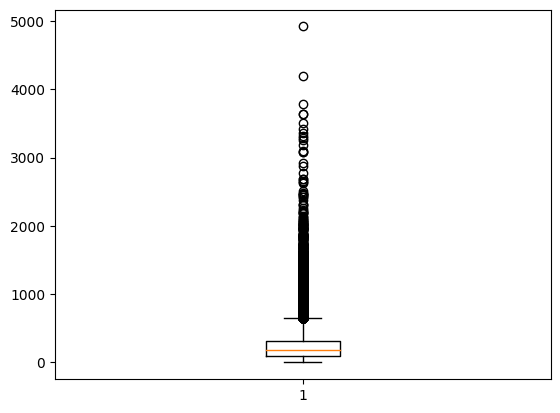

In [ ]:
plt.boxplot(df['duration'])

In [ ]:
df['duration'][df['duration']>2500].count()

24

In [ ]:
Q1=df['duration'].quantile(0.25)
Q3=df['duration'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR

In [ ]:
df['duration'][df['duration']>thre]=thre

<ipython-input-105-8638964c6ffc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][df['duration']>thre]=thre
<ipython-input-105-8638964c6ffc>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '644.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['duration'][df['duration']>thre]=thre


{'whiskers': [<matplotlib.lines.Line2D at 0x78db05e163b0>,
 'caps': [<matplotlib.lines.Line2D at 0x78db05e168f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78db05e16110>],
 'medians': [<matplotlib.lines.Line2D at 0x78db05e16e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x78db05e170d0>],
 'means': []}

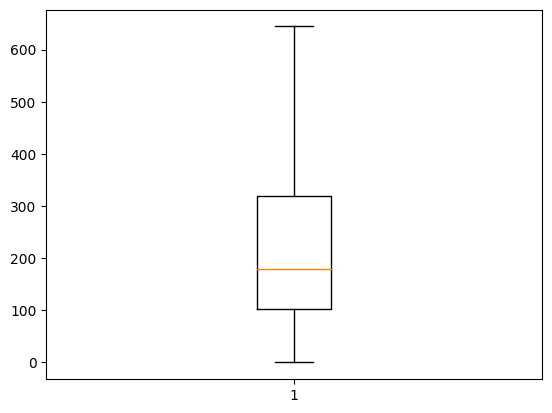

In [ ]:
plt.boxplot(df['duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78db05c91db0>,
 'caps': [<matplotlib.lines.Line2D at 0x78db05c922f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78db05c91b10>],
 'medians': [<matplotlib.lines.Line2D at 0x78db05c92830>],
 'fliers': [<matplotlib.lines.Line2D at 0x78db05c92ad0>],
 'means': []}

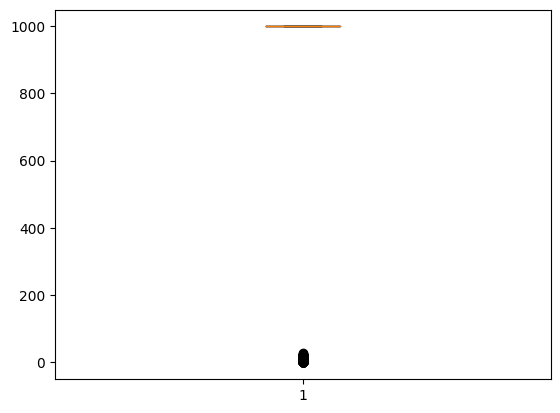

In [ ]:
plt.boxplot(df['pdays'])

In [ ]:
Q1=df['pdays'].quantile(0.25)
Q3=df['pdays'].quantile(0.75)
IQR=Q3-Q1
thre=Q1-1.5*IQR

In [ ]:
df['pdays'][df['pdays']<thre]=thre

<ipython-input-109-a6c4d9b963c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays'][df['pdays']<thre]=thre


{'whiskers': [<matplotlib.lines.Line2D at 0x78db05d0ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x78db05d0ce20>,
 'boxes': [<matplotlib.lines.Line2D at 0x78db05d0c760>],
 'medians': [<matplotlib.lines.Line2D at 0x78db05d0d360>],
 'fliers': [<matplotlib.lines.Line2D at 0x78db05d0d600>],
 'means': []}

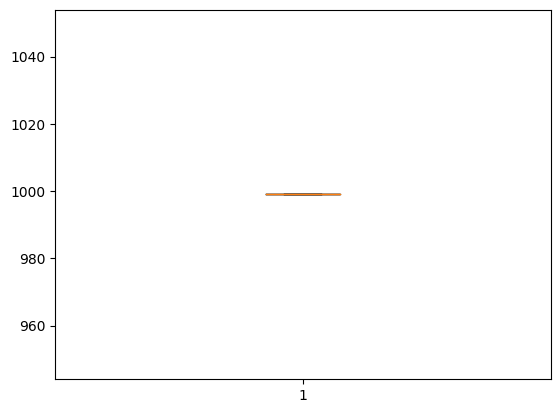

In [ ]:
plt.boxplot(df['pdays'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78db05b627d0>,
 'caps': [<matplotlib.lines.Line2D at 0x78db05b62d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x78db05b62530>],
 'medians': [<matplotlib.lines.Line2D at 0x78db05b63250>],
 'fliers': [<matplotlib.lines.Line2D at 0x78db05b634f0>],
 'means': []}

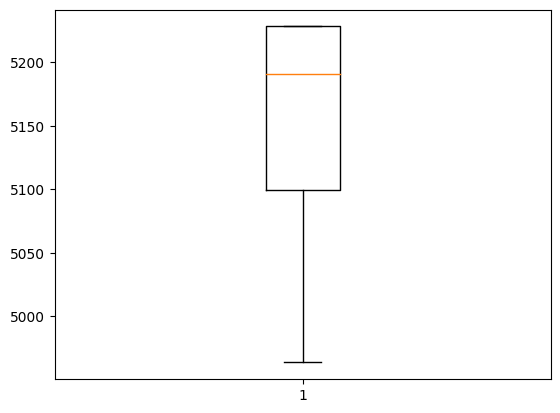

In [ ]:
plt.boxplot(df['nr_employed'])

**Distribution of data**

array([[<Axes: title={'center': 'nr_employed'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'previous'}>],
       [<Axes: title={'center': 'cons_conf_idx'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'cons_price_idx'}>, <Axes: >]],
      dtype=object)

<Figure size 2500x2500 with 0 Axes>

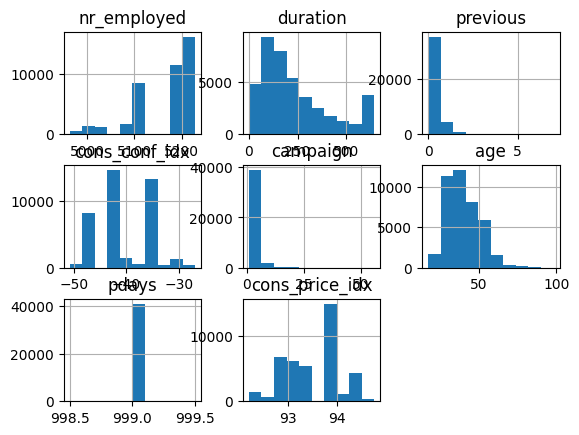

In [ ]:
plt.figure(figsize=(25,25))
num_col=list(set(df.columns)-obj_col)
df[num_col].hist()

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)

**Imbalanced classes**

In [ ]:
df['target'].value_counts() # use class_weight

,count
target,
0.0,36537
1.0,4639


# ML Models

**Split data to train & test**

In [ ]:
x=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**SVM**

In [ ]:
from sklearn.svm import SVC
svm=SVC(class_weight='balanced')
svm.fit(x_train,y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred=svm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      7265
         1.0       0.41      0.91      0.56       971

    accuracy                           0.83      8236
   macro avg       0.70      0.87      0.73      8236
weighted avg       0.92      0.83      0.86      8236



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred=svm.predict(x_test)

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      7265
         1.0       0.41      0.91      0.56       971

    accuracy                           0.83      8236
   macro avg       0.70      0.87      0.73      8236
weighted avg       0.92      0.83      0.86      8236



**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=svm.predict(x_test)

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      7265
         1.0       0.41      0.91      0.56       971

    accuracy                           0.83      8236
   macro avg       0.70      0.87      0.73      8236
weighted avg       0.92      0.83      0.86      8236

